In [2]:
# 模块1：导入库和加载数据
# 备注：加载train_data.xlsx，查看数据基本信息
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import os
nltk.download('punkt_tab')
nltk.download('stopwords')

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# 加载数据
file_path = '../data/train_data.xlsx'
data = pd.read_excel(file_path)

# 显示前几行和基本信息
print("数据集前5行：")
print(data.head())
print("\n数据集基本信息：")
print(data.info())
print("\n缺失值统计：")
print(data.isnull().sum())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rainn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rainn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


数据集前5行：
                                                              VideoTitle  \
0                                          This Hellcat CANNOT be stole    
1                          4 Years of Coding in 4 Minutes  A Short Movie   
2           Rescuing bear from car accident animals shortsfeed bear save   
3                    How to win Roblox Squid Game Shrimp Game every time   
4  Want to learn better Start mind mapping  Hazel Wagner  TEDxNaperville   

                                                                                           CommentText  \
0                                                       Does it work for a Ram Trx Im getting one soon   
1  It seems youre really embracing every moment of life with positivity And when you mention aapke ...   
2                                                                                    Not the same bear   
3  Bru the players r stupied just wait for the screen to flash green when she says green light  sto...   
4  Wo

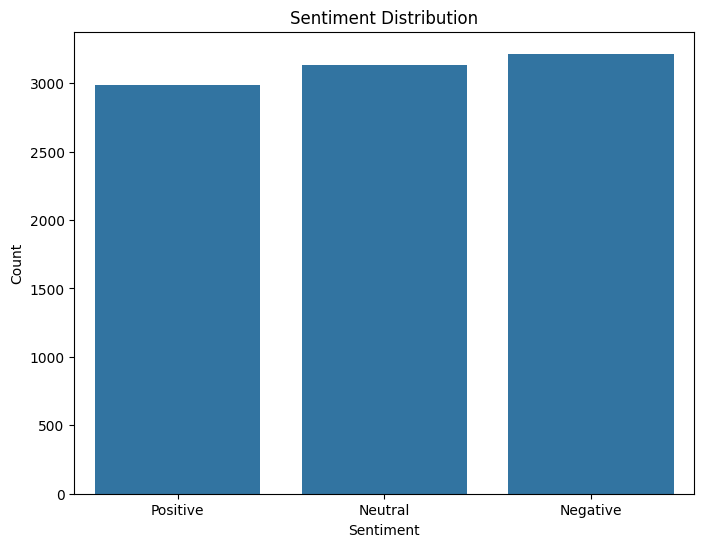


情感标签比例：
Sentiment
Negative    0.344403
Neutral     0.335619
Positive    0.319979
Name: proportion, dtype: float64


In [3]:
# 模块2：情感标签分布分析
# 备注：统计Sentiment的分布，检查类别是否平衡
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 打印具体比例
sentiment_counts = data['Sentiment'].value_counts(normalize=True)
print("\n情感标签比例：")
print(sentiment_counts)


Likes 统计描述：
count     9335.000000
mean        89.523085
std       1038.986542
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      62168.000000
Name: Likes, dtype: float64

Replies 统计描述：
count    9335.000000
mean        2.103482
std        13.623311
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       504.000000
Name: Replies, dtype: float64


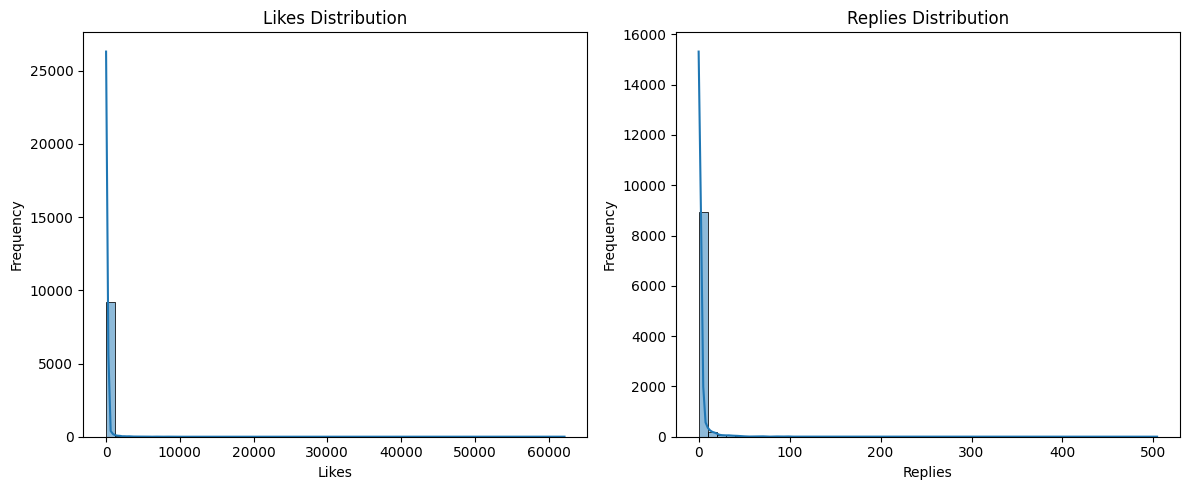

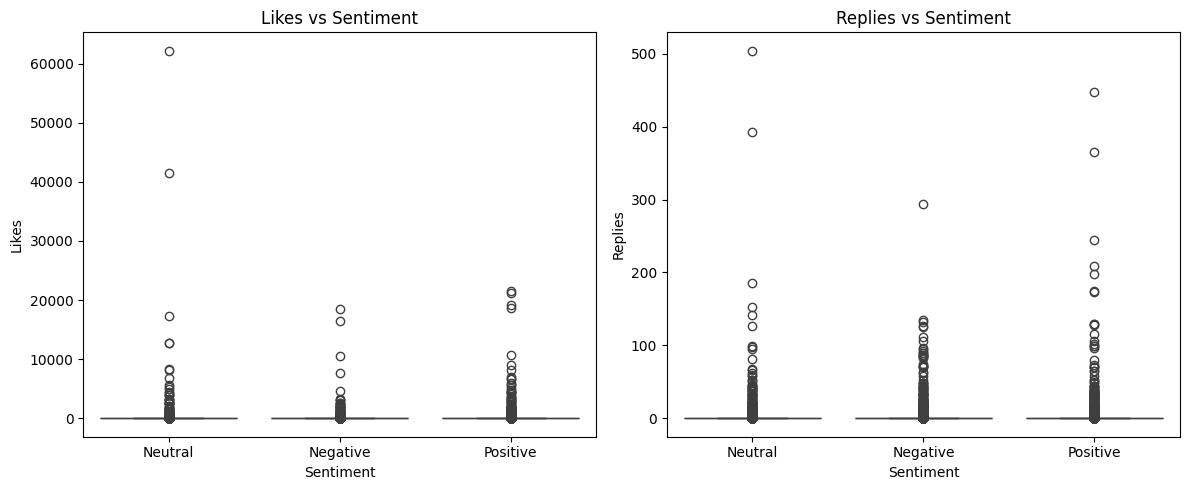

In [4]:
# 模块3：数值特征（Likes和Replies）分布分析
# 备注：分析Likes和Replies的统计特性，检查是否需要归一化
print("\nLikes 统计描述：")
print(data['Likes'].describe())
print("\nReplies 统计描述：")
print(data['Replies'].describe())

# 绘制Likes和Replies的分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Likes'], bins=50, kde=True)
plt.title('Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Replies'], bins=50, kde=True)
plt.title('Replies Distribution')
plt.xlabel('Replies')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 检查Likes和Replies与Sentiment的关系
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Sentiment', y='Likes', data=data)
plt.title('Likes vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.subplot(1, 2, 2)
sns.boxplot(x='Sentiment', y='Replies', data=data)
plt.title('Replies vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Replies')

plt.tight_layout()
plt.show()


CountryCode 分布（前10个）：
CountryCode
US    2989
AU    1303
GB    1172
CA    1080
IN    1051
IE     646
NZ     597
DE     360
PH     137
Name: count, dtype: int64

CategoryID 分布（前10个）：
CategoryID
25    3108
27    2664
26     741
17     612
24     441
28     434
15     425
2      367
20     279
22     139
Name: count, dtype: int64


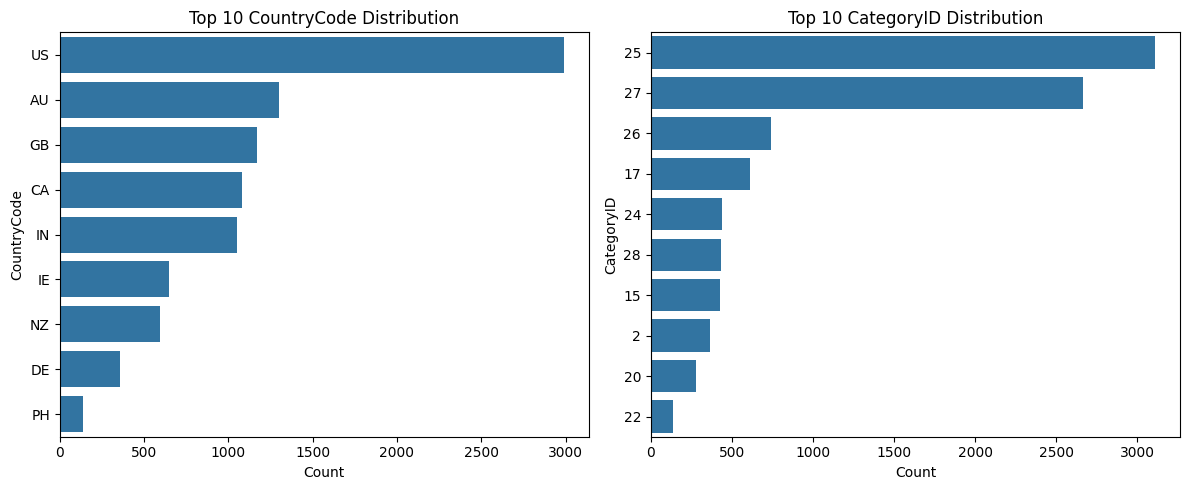

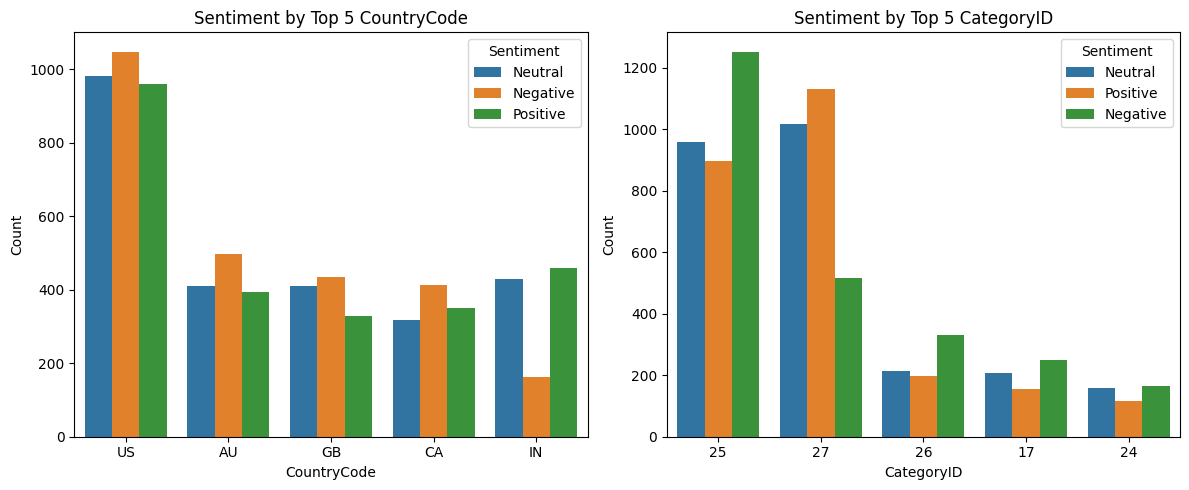

In [5]:
# 模块4：分类特征（CountryCode和CategoryID）分析
# 备注：统计CountryCode和CategoryID的分布，分析多样性
print("\nCountryCode 分布（前10个）：")
country_counts = data['CountryCode'].value_counts()[:10]
print(country_counts)

print("\nCategoryID 分布（前10个）：")
category_counts = data['CategoryID'].value_counts()[:10]
print(category_counts)

# 绘制分布图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(y='CountryCode', data=data, order=data['CountryCode'].value_counts().index[:10])
plt.title('Top 10 CountryCode Distribution')
plt.xlabel('Count')
plt.ylabel('CountryCode')

plt.subplot(1, 2, 2)
sns.countplot(y='CategoryID', data=data, order=data['CategoryID'].value_counts().index[:10])
plt.title('Top 10 CategoryID Distribution')
plt.xlabel('Count')
plt.ylabel('CategoryID')

plt.tight_layout()
plt.show()

# 分析CountryCode和CategoryID与Sentiment的关系
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='CountryCode', hue='Sentiment', data=data, order=data['CountryCode'].value_counts().index[:5])
plt.title('Sentiment by Top 5 CountryCode')
plt.xlabel('CountryCode')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='CategoryID', hue='Sentiment', data=data, order=data['CategoryID'].value_counts().index[:5])
plt.title('Sentiment by Top 5 CategoryID')
plt.xlabel('CategoryID')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rainn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



CommentText 长度统计：
count    9335.000000
mean       19.595715
std        28.765416
min         1.000000
25%         6.000000
50%        12.000000
75%        23.000000
max       767.000000
Name: CommentText_Length, dtype: float64

VideoTitle 长度统计：
count    9335.000000
mean        8.404392
std         3.256291
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        21.000000
Name: VideoTitle_Length, dtype: float64


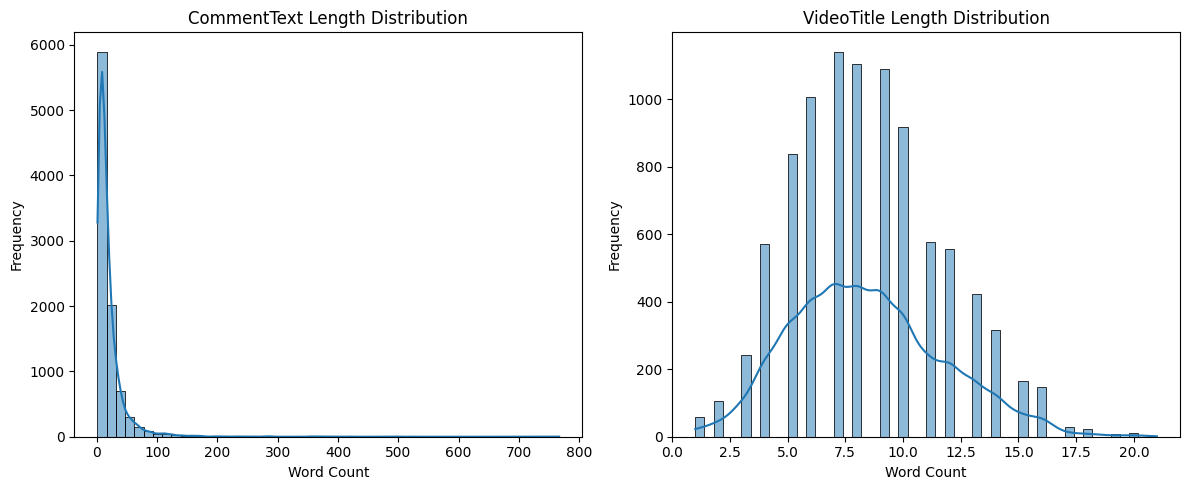


CommentText 前10个高频词：
[('the', 7108), ('to', 4403), ('a', 3981), ('and', 3750), ('i', 3603), ('is', 3058), ('of', 2631), ('you', 2475), ('in', 2424), ('this', 2095)]

检测到的语言：
en: 8109
tl: 134
id: 90
de: 83
af: 75
es: 75
fr: 71
so: 70
it: 67
unknown: 59
no: 46
nl: 43
sw: 41
et: 38
cy: 36
ca: 35
ro: 33
da: 29
tr: 25
pl: 23
fi: 22
vi: 20
pt: 19
hr: 19
sv: 18
sl: 12
sq: 11
lt: 9
hu: 9
sk: 9
cs: 3
lv: 2


In [6]:
# 模块5：文本特征（CommentText和VideoTitle）初步分析
# 备注：分析文本长度、词频，检查语言多样性和噪声
nltk.download('punkt')

# 计算CommentText和VideoTitle的长度
data['CommentText_Length'] = data['CommentText'].apply(lambda x: len(word_tokenize(str(x))))
data['VideoTitle_Length'] = data['VideoTitle'].apply(lambda x: len(word_tokenize(str(x))))

# 统计文本长度
print("\nCommentText 长度统计：")
print(data['CommentText_Length'].describe())
print("\nVideoTitle 长度统计：")
print(data['VideoTitle_Length'].describe())

# 绘制长度分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['CommentText_Length'], bins=50, kde=True)
plt.title('CommentText Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['VideoTitle_Length'], bins=50, kde=True)
plt.title('VideoTitle Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 简单词频分析（仅CommentText）
all_comments = ' '.join(data['CommentText'].astype(str))
tokens = word_tokenize(all_comments.lower())
word_freq = Counter(tokens)
print("\nCommentText 前10个高频词：")
print(word_freq.most_common(10))

from langdetect import detect, LangDetectException

def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

languages = data['CommentText'].astype(str).apply(safe_detect)
data['Language'] = languages
print("\n检测到的语言：")
for lang, count in Counter(languages).most_common():
    print(f"{lang}: {count}")

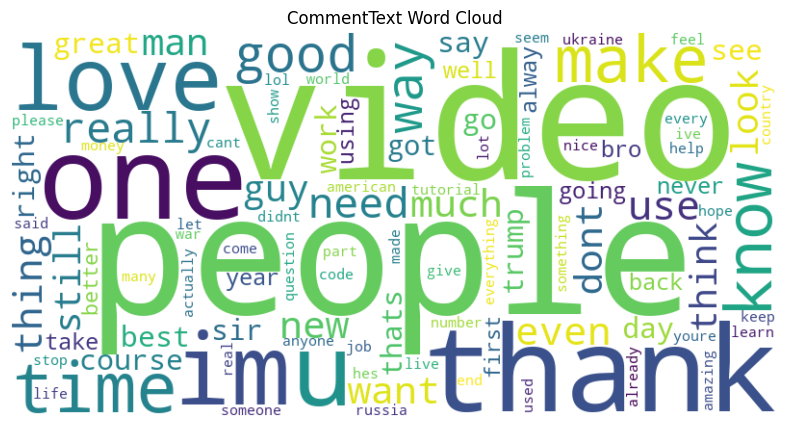

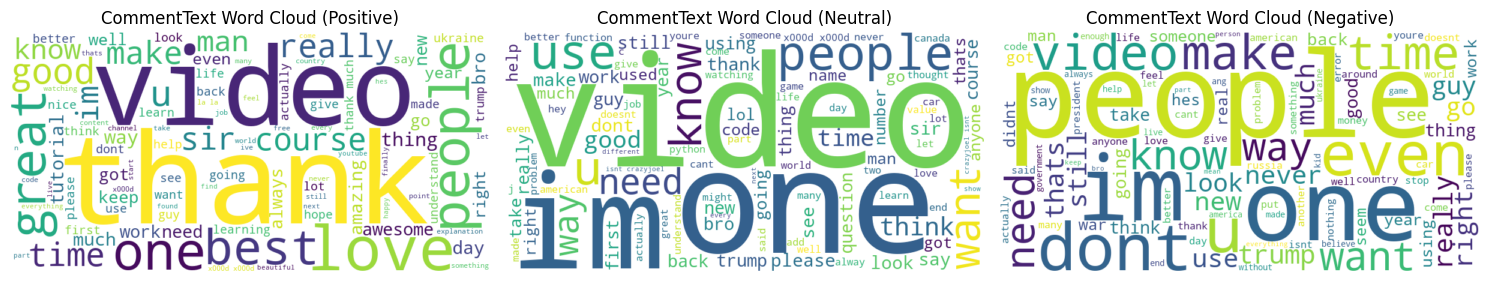

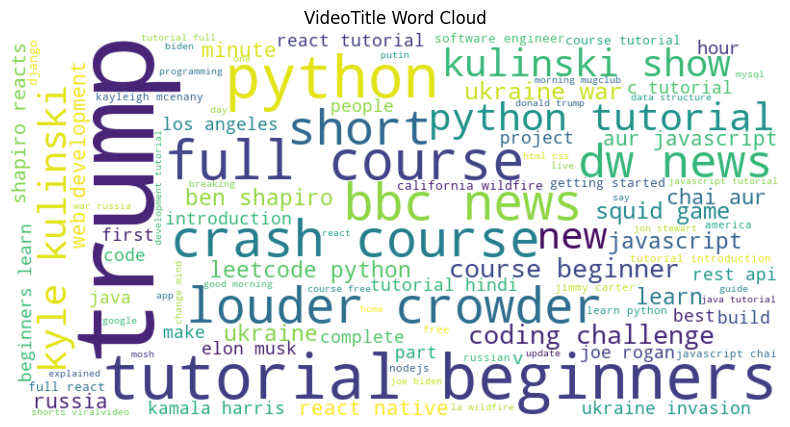

In [7]:
# 模块6：词云分析
# 备注：生成CommentText和VideoTitle的词云，分析整体和按Sentiment分类的关键词
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# 设置停用词
stop_words = set(stopwords.words('english'))

# 清理文本函数
def clean_text_for_wordcloud(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return ' '.join(word for word in text.split() if word not in stop_words)

# 整体CommentText词云
all_comments = ' '.join(data['CommentText'].apply(clean_text_for_wordcloud))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CommentText Word Cloud')
plt.show()

# 按Sentiment分类的CommentText词云
plt.figure(figsize=(15, 5))
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative'], 1):
    subset = data[data['Sentiment'] == sentiment]
    text = ' '.join(subset['CommentText'].apply(clean_text_for_wordcloud))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'CommentText Word Cloud ({sentiment})')
plt.tight_layout()
plt.show()

# 整体VideoTitle词云
all_titles = ' '.join(data['VideoTitle'].apply(clean_text_for_wordcloud))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('VideoTitle Word Cloud')
plt.show()

In [8]:
import torch
# 检验GPU可用性
import torch

if torch.cuda.is_available():
   print("CUDA is available!")
   device = torch.device("cuda")  # 设置设备为 GPU
else:
   print("CUDA is not available.")
   device = torch.device("cpu")  # 设置设备为 CPU


CUDA is available!
